In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [3]:
class Perceptron:
    '''Perceptron classifier.
    
    Parameters
    ----------
    eta : float
        Learning rate [0.0 - 1.0]
    n_iter : int
        Passes over the training dataset
    random_state : int
        seed for random generator
    
    Attributes
    ----------
    w_ : 1d-array
        Weights after fitting
    errors_ : list
        number of missclassification in each epoch.
    '''
    def __init__(self, eta=.01, n_iter=50, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    
    def fit(self, X, y):
        '''Fit training data
        
        Parameters
        ----------
        X : 2d-array, shape = [n_samples, n_features]
            Training data
        y : 1d-array, shape = [n_samples]
            Target values
            
        Return
        ------
        self : object
        '''
        rng = np.random.RandomState(seed=self.random_state)
        self.w_ = rng.normal(loc=0, scale=.01, size=1+X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.n_iter):
            error = 0
            for xi, val in zip(X, y):
                delta_w = self.eta * (val - self.predict(xi))
                self.w_[1:] += delta_w * xi
                self.w_[0] += delta_w
                error += int(delta_w != 0)
            self.errors_.append(error)
        return self
        
    def predict(self, X):
        '''Return class label after unit step'''
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    
    
    def net_input(self, X):
        '''calculate net input'''
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
                 header=None)

In [5]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris = load_iris()

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
df = pd.DataFrame(np.c_[iris.data, iris.target], columns=iris.feature_names + ['species'])

In [9]:
df['species'].value_counts()

2.0    50
1.0    50
0.0    50
Name: species, dtype: int64

In [10]:
y = df.iloc[:100, 4]

X = df.iloc[:100, [0, 2]].values

X.shape, y.shape

((100, 2), (100,))

Text(0,0.5,'petal length[cm]')

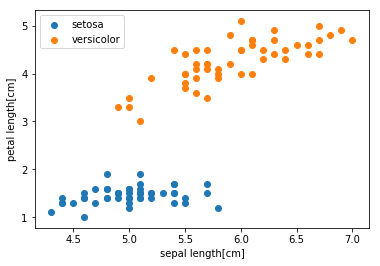

In [11]:
plt.scatter(X[:50, 0], X[:50, 1], label='setosa')
plt.scatter(X[50:, 0], X[50:, 1], label='versicolor')
plt.legend()
plt.xlabel('sepal length[cm]')
plt.ylabel('petal length[cm]')

In [19]:
ppn = Perceptron(eta=.01, n_iter=10)

y = np.where(y==0, 1, -1)

In [20]:
ppn.fit(X, y)

Text(0,0.5,'error count')

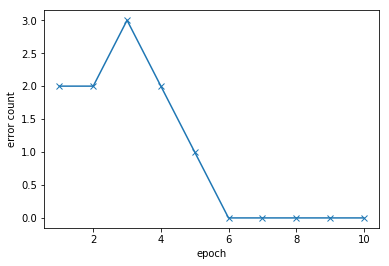

In [21]:
plt.plot(range(1, 11), ppn.errors_, 'x-')
plt.xlabel('epoch')
plt.ylabel('error count')

In [22]:
from matplotlib.colors import ListedColormap

In [23]:
def plot_decision(X, y, classifier, resolution=.02):
    
    markers = 'sxo^v' 
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    
    cmap = ListedColormap(colors[: len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1
    x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1
    
    XX = np.arange(x1_min, x1_max, resolution)
    YY = np.arange(x2_min, x2_max, resolution)
    
    XX, YY = np.meshgrid(XX, YY)
    Z = classifier.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    
    # plot contour
    plt.contourf(XX, YY, Z, cmap=cmap, alpha=.3)
    
    # plot data
    for yi, m, c in zip(np.unique(y), markers, colors):
        plt.scatter(X[y==yi, 0], X[y==yi, 1], color=c, marker=m, label="{}".format(yi), alpha=.6)
    plt.legend()
    plt.axis([x1_min, x1_max, x2_min, x2_max])

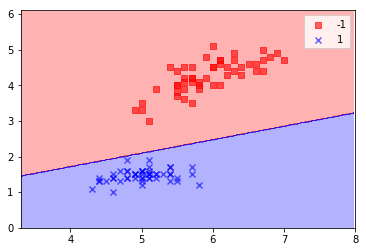

In [24]:
plot_decision(X, y, ppn)

### ADAptive LInear NEuron (Adaline)

In [55]:
class AdalineGD:
    '''ADAptive LInear Neuron classifier
    
    Parameters
    ----------
    eta : float [0.0 - 1.0]
        learning rate
    n_iter : int
        number of training epoch
    random_state : int
        seed number for random generator
        
    Attributes
    ----------
    w_ : 1d-array
        weights after fitting
    cost_ : list
        sum of squares error in each epoch.
    '''
    def __init__(self, eta=0.01, n_iter=50, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        rng = np.random.RandomState(self.random_state)
        self.w_ = rng.normal(loc=0, scale=.01, size=X.shape[1]+1)
        
        self.cost_ = []
        
        for _ in range(self.n_iter):
            error = y - self.activation(self.net_input(X))
            delta_w = self.eta * np.dot(error, X)
            self.w_[1:] += delta_w
            self.w_[0] += self.eta * error.sum()
            self.cost_.append(0.5*(error**2).sum())
        return self
    
    def net_input(self, X):
        '''return X*w'''
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        '''activation function'''
        return X
    
    def predict(self, X):
        '''return class label [1, -1]'''
        return np.where(self.activation(self.net_input(X)) >= 0, 1, -1)

In [56]:
ada = AdalineGD(eta=.0001, n_iter=10)

In [57]:
ada.fit(X, y)

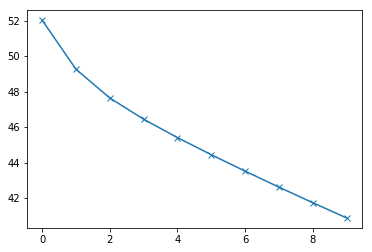

In [58]:
plt.plot(ada.cost_, 'x-')

In [59]:
X_std = np.copy(X)

In [60]:
X_std = (X_std - X_std.mean(axis=0)) / X_std.std(axis=0)

In [61]:
X_std.shape

(100, 2)

In [62]:
ada = AdalineGD(n_iter=15, eta=.01)
ada.fit(X_std, y)

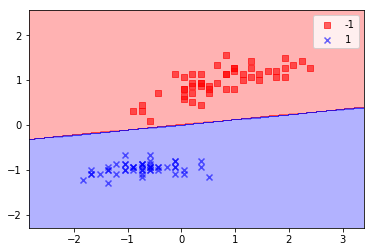

In [63]:
plot_decision(X_std, y, ada)

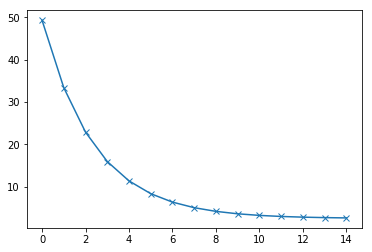

In [64]:
plt.plot(ada.cost_, 'x-')

### Large-scale ML & stochastic gradient descent

In [94]:
class AdalineSGD:
    '''ADAptive LInear Neuron classifier.
    
    Parameters
    ----------
    eta : float
        learning rage (between 0.0 and 1.0)
    n_iter : int
        number of epochs
    shuffle : bool (default: True)
        shuffle training data each epoch if True
    random_state : int
        seed number for random generator
        
    Attributes
    ----------
    w_ : 1d-array
        weights after fitting
    cost_ : list
        average sum of squares error for each epoch
    '''
    def __init__(self, eta=0.01, n_iter=50, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        '''Fit training data.
        
        Parameters
        ----------
        X : 2d-array, shape=[n_samples, n_features]
            training data
        y : 1d-array, shape=[n_samples]
            target values
            
        Return
        ------
        self : object
        '''
        # init weight
        self.w_ = self._init_weights(X.shape[1])
        
        # train n epoch
        self.cost_ = []
        
        for _ in range(self.n_iter):
            
            if self.shuffle:
                X, y = self._shuffle(X, y)
            
            cost = []
            for xi, yi in zip(X, y):
                cost.append(self._update_weights(xi, yi))
            self.cost_.append(sum(cost) / len(y))
        return self
        
    def predict(self, X):
        '''return lass label after unit step'''
        return np.where(self.activation(self.net_input(X)) >= 0, 1, -1)
    
    def partial_fit(self, X, y):
        '''Fitting data without reinitializing the weights'''
        if not self.w_initialized:
            return self.fit(X, y)
        
        if y.ravel().shape[0] > 1:
            for xi, yi in zip(X, y):
                self._update_weights(xi, yi)
        else:
            self._update_weights(X, y)
        return self
    
    
    def _shuffle(self, X, y):
        '''shuffle training data'''
        idx = self.rng.permutation(len(y))
        return X[idx], y[idx]
    
    def _init_weights(self, m):
        '''initialize weights'''
        self.rng = np.random.RandomState(self.random_state)
        self.w_initialized = True
        return self.rng.normal(loc=0, scale=.01, size=m+1)
    
    def _update_weights(self, xi, target):
        '''apply Adaline learning rule to update the weights'''
        error =  target - self.net_input(xi)
        self.w_[1:] += self.eta * error * xi
        self.w_[0] += self.eta * error
        return 0.5*error**2
    
    def net_input(self, X):
        '''calculate net input [X*w]'''
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        '''activation function'''
        return X

In [95]:
ada = AdalineSGD(n_iter=15, eta=.01, random_state=1)

In [96]:
ada.fit(X_std, y)

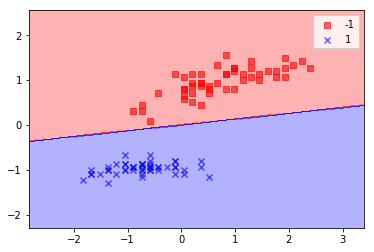

In [97]:
plot_decision(X_std, y, ada)

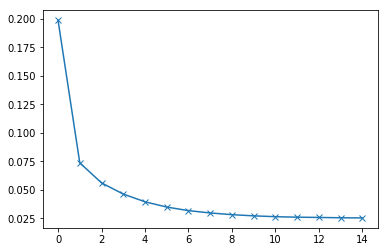

In [98]:
plt.plot(ada.cost_, 'x-')

In [101]:
ada.partial_fit(X_std[0], y[0])

In [102]:
y.ravel().shape

(100,)

In [103]:
y[0].ravel()

array([1])